In [ ]:
# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
import re
import pprint

In [ ]:
# webscraping skysports and wikipedia for relevant data

In [3]:
url1 = "https://www.skysports.com/premier-league-table/2019"

In [4]:
resource = requests.get(url1)

In [5]:
soup1 = BeautifulSoup(resource.text, 'html.parser')
type(soup1)

bs4.BeautifulSoup

In [6]:
title1 = soup1.title.text
print(title1)

Premier League Table & Standings - Sky Sports Football


In [7]:
print(resource.status_code)

200


In [8]:
league_table = soup1.find('table', class_ = "standing-table__table")

In [9]:
final_table = []
for team in league_table.find_all('tbody'):
        rows = team.find_all('tr')
        for row in rows:
            position = row.find_all('td', class_="standing-table__cell")[0].text
            teams = row.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
            games_played = row.find_all('td', class_ = "standing-table__cell")[2].text
            win = row.find_all('td', class_ = "standing-table__cell")[3].text
            draw = row.find_all('td', class_ = "standing-table__cell")[4].text
            lose = row.find_all('td', class_ = "standing-table__cell")[5].text
            goal_for = row.find_all('td', class_ = "standing-table__cell")[6].text
            goal_against = row.find_all('td', class_ = "standing-table__cell")[7].text
            goal_dif = row.find_all('td', class_ = "standing-table__cell")[8].text
            points = row.find_all('td', class_ = "standing-table__cell")[9].text
            print(position, teams, games_played, win, draw, lose, goal_for, goal_against, goal_dif, points)

1 Liverpool 38 32 3 3 85 33 52 99
2 Manchester City 38 26 3 9 102 35 67 81
3 Manchester United 38 18 12 8 66 36 30 66
4 Chelsea 38 20 6 12 69 54 15 66
5 Leicester City 38 18 8 12 67 41 26 62
6 Tottenham Hotspur 38 16 11 11 61 47 14 59
7 Wolverhampton Wanderers 38 15 14 9 51 40 11 59
8 Arsenal 38 14 14 10 56 48 8 56
9 Sheffield United 38 14 12 12 39 39 0 54
10 Burnley 38 15 9 14 43 50 -7 54
11 Southampton 38 15 7 16 51 60 -9 52
12 Everton 38 13 10 15 44 56 -12 49
13 Newcastle United 38 11 11 16 38 58 -20 44
14 Crystal Palace 38 11 10 17 31 50 -19 43
15 Brighton and Hove Albion 38 9 14 15 39 54 -15 41
16 West Ham United 38 10 9 19 49 62 -13 39
17 Aston Villa 38 9 8 21 41 67 -26 35
18 Bournemouth 38 9 7 22 40 65 -25 34
19 Watford 38 8 10 20 36 64 -28 34
20 Norwich City 38 5 6 27 26 75 -49 21


In [10]:
epl_table = pd.DataFrame(
    [[1, 'Liverpool', 38, 32, 3, 3, 85, 33, 52, 99],
    [2, 'Manchester City', 38, 26, 3, 9, 102, 35, 67, 81],
    [3, 'Manchester United', 38, 18, 12, 8, 66, 36, 30, 66],
    [4, 'Chelsea', 38, 20, 6, 12, 69, 54, 15, 66],
    [5, 'Leicester City', 38, 18, 8, 12, 67, 41, 26, 62],
    [6, 'Tottenham Hotspur', 38, 16, 11, 11, 61, 47, 14, 59],
    [7, 'Wolverhampton Wanderers', 38, 15, 14, 9, 51, 40, 11, 59],
    [8, 'Arsenal', 38, 14, 14, 10, 56, 48, 8, 56],
    [9, 'Sheffield United', 38, 14, 12, 12, 39, 39, 0, 54],
    [10, 'Burnley', 38, 15, 9, 14, 43, 50, -7, 54],
    [11, 'Southampton', 38, 15, 7, 16, 51, 60, -9, 52],
    [12, 'Everton', 38, 13, 10, 15, 44, 56, -12, 49],
    [13, 'Newcastle United', 38, 11, 11, 16, 38, 58, -20, 44],
    [14, 'Crystal Palace', 38, 11, 10, 17, 31, 50, -19, 43],
    [15, 'Brighton and Hove Albion', 38, 9, 14, 15, 39, 54, -15, 41],
    [16, 'West Ham United', 38, 10, 9, 19, 49, 62, -13, 39],
    [17, 'Aston Villa', 38, 9, 8, 21, 41, 67, -26, 35],
    [18, 'Bournemouth', 38, 9, 7, 22, 40, 65, -25, 34],
    [19, 'Watford', 38, 8, 10, 20, 36, 64, -28, 34],
    [20, 'Norwich City', 38, 5, 6, 27, 26, 75, -49, 21]],
    index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    columns = ['position', 'teams', 'games_played', 'win', 'draw', 'lose', 'goal_for', 'goal_against', 'goal_dif', 'points'])  

In [ ]:
#converting epl_table to data frame

In [11]:
print(epl_table)

    position                     teams  games_played  win  draw  lose  \
1          1                 Liverpool            38   32     3     3   
2          2           Manchester City            38   26     3     9   
3          3         Manchester United            38   18    12     8   
4          4                   Chelsea            38   20     6    12   
5          5            Leicester City            38   18     8    12   
6          6         Tottenham Hotspur            38   16    11    11   
7          7   Wolverhampton Wanderers            38   15    14     9   
8          8                   Arsenal            38   14    14    10   
9          9          Sheffield United            38   14    12    12   
10        10                   Burnley            38   15     9    14   
11        11               Southampton            38   15     7    16   
12        12                   Everton            38   13    10    15   
13        13          Newcastle United            3

In [12]:
#epl_table to csv format
epl_table.to_csv('var_table.csv', index = False, header = True)

In [98]:
league_table = pd.read_csv('var_table.csv')
league_table
plt.savefig('mytable.png')

<Figure size 864x576 with 0 Axes>

In [16]:
league_table['points/game'] = league_table['points']/league_table['games_played']

In [17]:
print(league_table)

    position                     teams  games_played  win  draw  lose  \
0          1                 Liverpool            38   32     3     3   
1          2           Manchester City            38   26     3     9   
2          3         Manchester United            38   18    12     8   
3          4                   Chelsea            38   20     6    12   
4          5            Leicester City            38   18     8    12   
5          6         Tottenham Hotspur            38   16    11    11   
6          7   Wolverhampton Wanderers            38   15    14     9   
7          8                   Arsenal            38   14    14    10   
8          9          Sheffield United            38   14    12    12   
9         10                   Burnley            38   15     9    14   
10        11               Southampton            38   15     7    16   
11        12                   Everton            38   13    10    15   
12        13          Newcastle United            3

In [18]:
league_table.to_csv('league_table.csv', index = False, header = True)

In [101]:
league_table = pd.read_csv('league_table.csv')
plt.savefig('ourtable.png', dpi = 72, bbox_inches = 'tight')
league_table

,position,teams,games_played,win,draw,lose,goal_for,goal_against,goal_dif,points,points/game
0,1,Liverpool,38,32,3,3,85,33,52,99,2.605263
1,2,Manchester City,38,26,3,9,102,35,67,81,2.131579
2,3,Manchester United,38,18,12,8,66,36,30,66,1.736842
3,4,Chelsea,38,20,6,12,69,54,15,66,1.736842
4,5,Leicester City,38,18,8,12,67,41,26,62,1.631579
5,6,Tottenham Hotspur,38,16,11,11,61,47,14,59,1.552632
6,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59,1.552632
7,8,Arsenal,38,14,14,10,56,48,8,56,1.473684
8,9,Sheffield United,38,14,12,12,39,39,0,54,1.421053
9,10,Burnley,38,15,9,14,43,50,-7,54,1.421053


<Figure size 864x576 with 0 Axes>

In [ ]:
# web scraping wikipedia for league statistics

In [20]:
url = "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"
page = requests.get(url)

In [21]:
soup = BeautifulSoup(page.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [22]:
print(page.status_code)

200


In [23]:
title = soup.title.text
print(title)

2019–20 Premier League - Wikipedia


In [24]:
goals_chart = soup.find_all('table', class_="wikitable")[5]
df = pd.read_html(str(goals_chart))
df = pd.DataFrame(df[0])
print(df)

   Rank                     Player                     Club  Goals[139]
0     1                Jamie Vardy           Leicester City          23
1     2  Pierre-Emerick Aubameyang                  Arsenal          22
2     2                 Danny Ings              Southampton          22
3     4            Raheem Sterling          Manchester City          20
4     5              Mohamed Salah                Liverpool          19
5     6                 Harry Kane        Tottenham Hotspur          18
6     6                 Sadio Mané                Liverpool          18
7     8               Raúl Jiménez  Wolverhampton Wanderers          17
8     8            Anthony Martial        Manchester United          17
9     8            Marcus Rashford        Manchester United          17


In [25]:
df.to_csv('goal_chart.csv', index = False, header = True)

In [26]:
top_scorers = pd.read_csv('goal_chart.csv')
top_scorers

,Rank,Player,Club,Goals[139]
0,1,Jamie Vardy,Leicester City,23
1,2,Pierre-Emerick Aubameyang,Arsenal,22
2,2,Danny Ings,Southampton,22
3,4,Raheem Sterling,Manchester City,20
4,5,Mohamed Salah,Liverpool,19
5,6,Harry Kane,Tottenham Hotspur,18
6,6,Sadio Mané,Liverpool,18
7,8,Raúl Jiménez,Wolverhampton Wanderers,17
8,8,Anthony Martial,Manchester United,17
9,8,Marcus Rashford,Manchester United,17


In [27]:
top_scorers.columns = ['Rank', 'Player', 'Club', 'Goals']
top_scorers

,Rank,Player,Club,Goals
0,1,Jamie Vardy,Leicester City,23
1,2,Pierre-Emerick Aubameyang,Arsenal,22
2,2,Danny Ings,Southampton,22
3,4,Raheem Sterling,Manchester City,20
4,5,Mohamed Salah,Liverpool,19
5,6,Harry Kane,Tottenham Hotspur,18
6,6,Sadio Mané,Liverpool,18
7,8,Raúl Jiménez,Wolverhampton Wanderers,17
8,8,Anthony Martial,Manchester United,17
9,8,Marcus Rashford,Manchester United,17


In [28]:
assists = soup.find_all('table', class_="wikitable")[7]
as_df = pd.read_html(str(assists))
as_df = pd.DataFrame(as_df[0])
print(as_df)

   Rank                  Player                     Club  Assists[150]
0     1         Kevin De Bruyne          Manchester City            20
1     2  Trent Alexander-Arnold                Liverpool            13
2     3        Andrew Robertson                Liverpool            12
3     4           Mohamed Salah                Liverpool            10
4     4             David Silva          Manchester City            10
5     4           Son Heung-min        Tottenham Hotspur            10
6     7            Riyad Mahrez          Manchester City             9
7     7            Adama Traoré  Wolverhampton Wanderers             9
8     9           Harvey Barnes           Leicester City             8
9     9         Roberto Firmino                Liverpool             8


In [29]:
as_df.to_csv('assists.csv', index = False, header = True)

In [30]:
assists_chart = pd.read_csv('assists.csv')
assists_chart

,Rank,Player,Club,Assists[150]
0,1,Kevin De Bruyne,Manchester City,20
1,2,Trent Alexander-Arnold,Liverpool,13
2,3,Andrew Robertson,Liverpool,12
3,4,Mohamed Salah,Liverpool,10
4,4,David Silva,Manchester City,10
5,4,Son Heung-min,Tottenham Hotspur,10
6,7,Riyad Mahrez,Manchester City,9
7,7,Adama Traoré,Wolverhampton Wanderers,9
8,9,Harvey Barnes,Leicester City,8
9,9,Roberto Firmino,Liverpool,8


In [31]:
assists_chart.columns = ['Rank', 'Player', 'Club', 'Assists']
assists_chart

,Rank,Player,Club,Assists
0,1,Kevin De Bruyne,Manchester City,20
1,2,Trent Alexander-Arnold,Liverpool,13
2,3,Andrew Robertson,Liverpool,12
3,4,Mohamed Salah,Liverpool,10
4,4,David Silva,Manchester City,10
5,4,Son Heung-min,Tottenham Hotspur,10
6,7,Riyad Mahrez,Manchester City,9
7,7,Adama Traoré,Wolverhampton Wanderers,9
8,9,Harvey Barnes,Leicester City,8
9,9,Roberto Firmino,Liverpool,8


In [32]:
gk_rank = soup.find_all('table', class_="wikitable")[8]
gk_df = pd.read_html(str(gk_rank))
gk_df = pd.DataFrame(gk_df[0])
print(gk_df)

    Rank             Player                     Club  Cleansheets[151]
0      1            Ederson          Manchester City                16
1      2          Nick Pope                  Burnley                15
2      3            Alisson                Liverpool                13
3      3       David de Gea        Manchester United                13
4      3     Dean Henderson         Sheffield United                13
5      3       Rui Patrício  Wolverhampton Wanderers                13
6      3  Kasper Schmeichel           Leicester City                13
7      8    Martin Dúbravka         Newcastle United                11
8      9     Vicente Guaita           Crystal Palace                10
9     10         Ben Foster                  Watford                 9
10    10    Jordan Pickford                  Everton                 9
11    10        Mathew Ryan   Brighton & Hove Albion                 9


In [33]:
gk_df.to_csv('clean_sheet.csv', header = True, index = False)

In [34]:
clean_sheet = pd.read_csv('clean_sheet.csv')
clean_sheet

,Rank,Player,Club,Cleansheets[151]
0,1,Ederson,Manchester City,16
1,2,Nick Pope,Burnley,15
2,3,Alisson,Liverpool,13
3,3,David de Gea,Manchester United,13
4,3,Dean Henderson,Sheffield United,13
5,3,Rui Patrício,Wolverhampton Wanderers,13
6,3,Kasper Schmeichel,Leicester City,13
7,8,Martin Dúbravka,Newcastle United,11
8,9,Vicente Guaita,Crystal Palace,10
9,10,Ben Foster,Watford,9


In [35]:
clean_sheet.columns = ['Rank', 'Player', 'Club', 'Clean sheets']
clean_sheet

,Rank,Player,Club,Clean sheets
0,1,Ederson,Manchester City,16
1,2,Nick Pope,Burnley,15
2,3,Alisson,Liverpool,13
3,3,David de Gea,Manchester United,13
4,3,Dean Henderson,Sheffield United,13
5,3,Rui Patrício,Wolverhampton Wanderers,13
6,3,Kasper Schmeichel,Leicester City,13
7,8,Martin Dúbravka,Newcastle United,11
8,9,Vicente Guaita,Crystal Palace,10
9,10,Ben Foster,Watford,9


# VISUALISATIONS

In [36]:
import pylab as pl

In [37]:
league_table1 = league_table[['teams', 'win']].sort_values(by = 'win', ascending = True)

In [38]:
ind = league_table1.set_index('teams', inplace = True)

In [39]:
league_table1

,win
teams,
Norwich City,5
Watford,8
Bournemouth,9
Aston Villa,9
Brighton and Hove Albion,9
West Ham United,10
Crystal Palace,11
Newcastle United,11
Everton,13


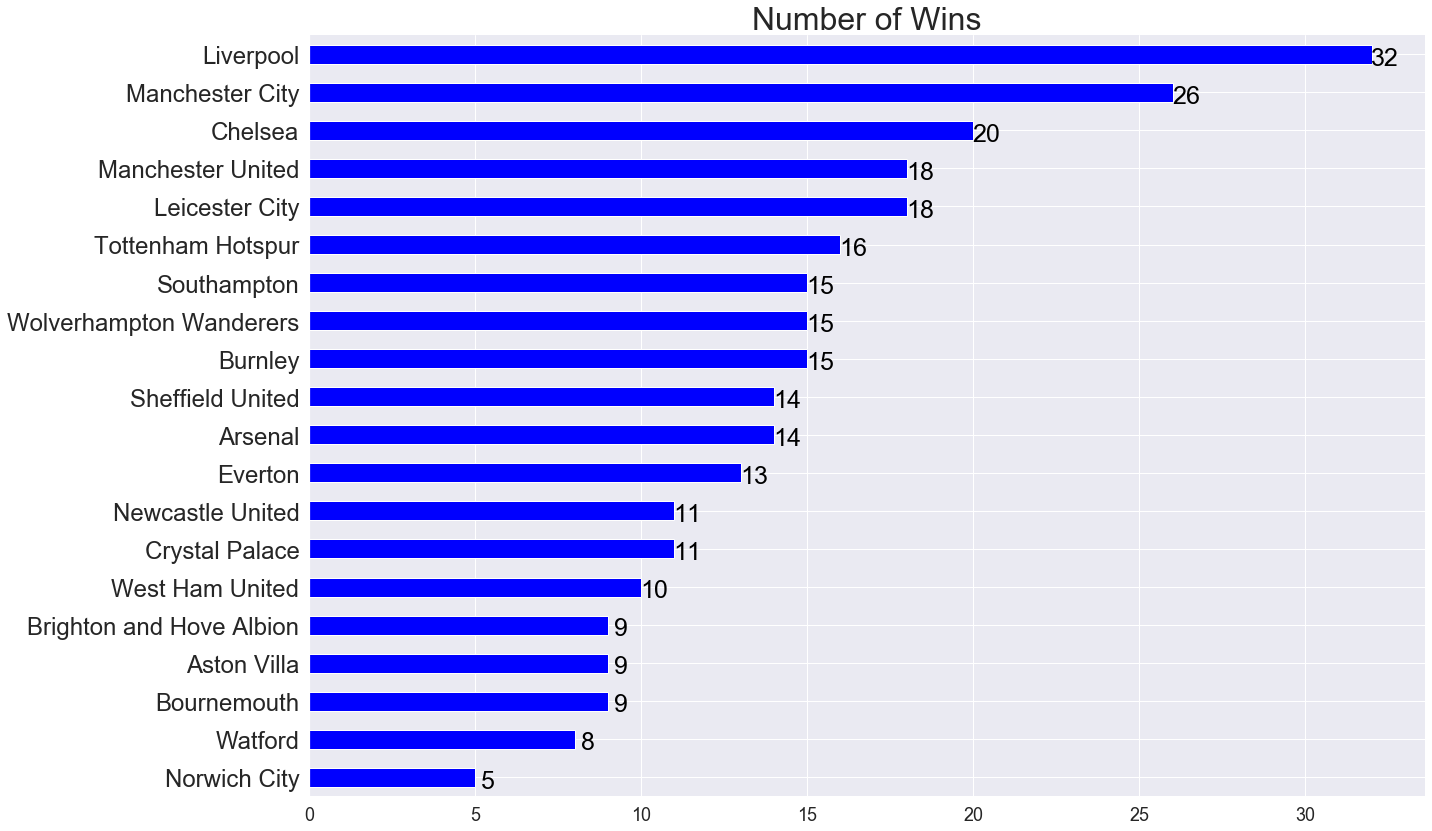

<Figure size 864x576 with 0 Axes>

In [53]:
bar = league_table1.plot(kind = 'barh', figsize = (20, 14), color = 'blue', legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind, fontsize = 18)
plt.ylabel('')
plt.title('Number of Wins', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.4, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center',
             va = 'center')
plt.show()
plt.savefig('16.png', dpi = 150, bbox_inches = 'tight')

In [56]:
league_table2 = league_table[['teams', 'lose']].sort_values(by = 'lose', ascending = True)

In [57]:
ind2 = league_table2.set_index('teams', inplace = True)

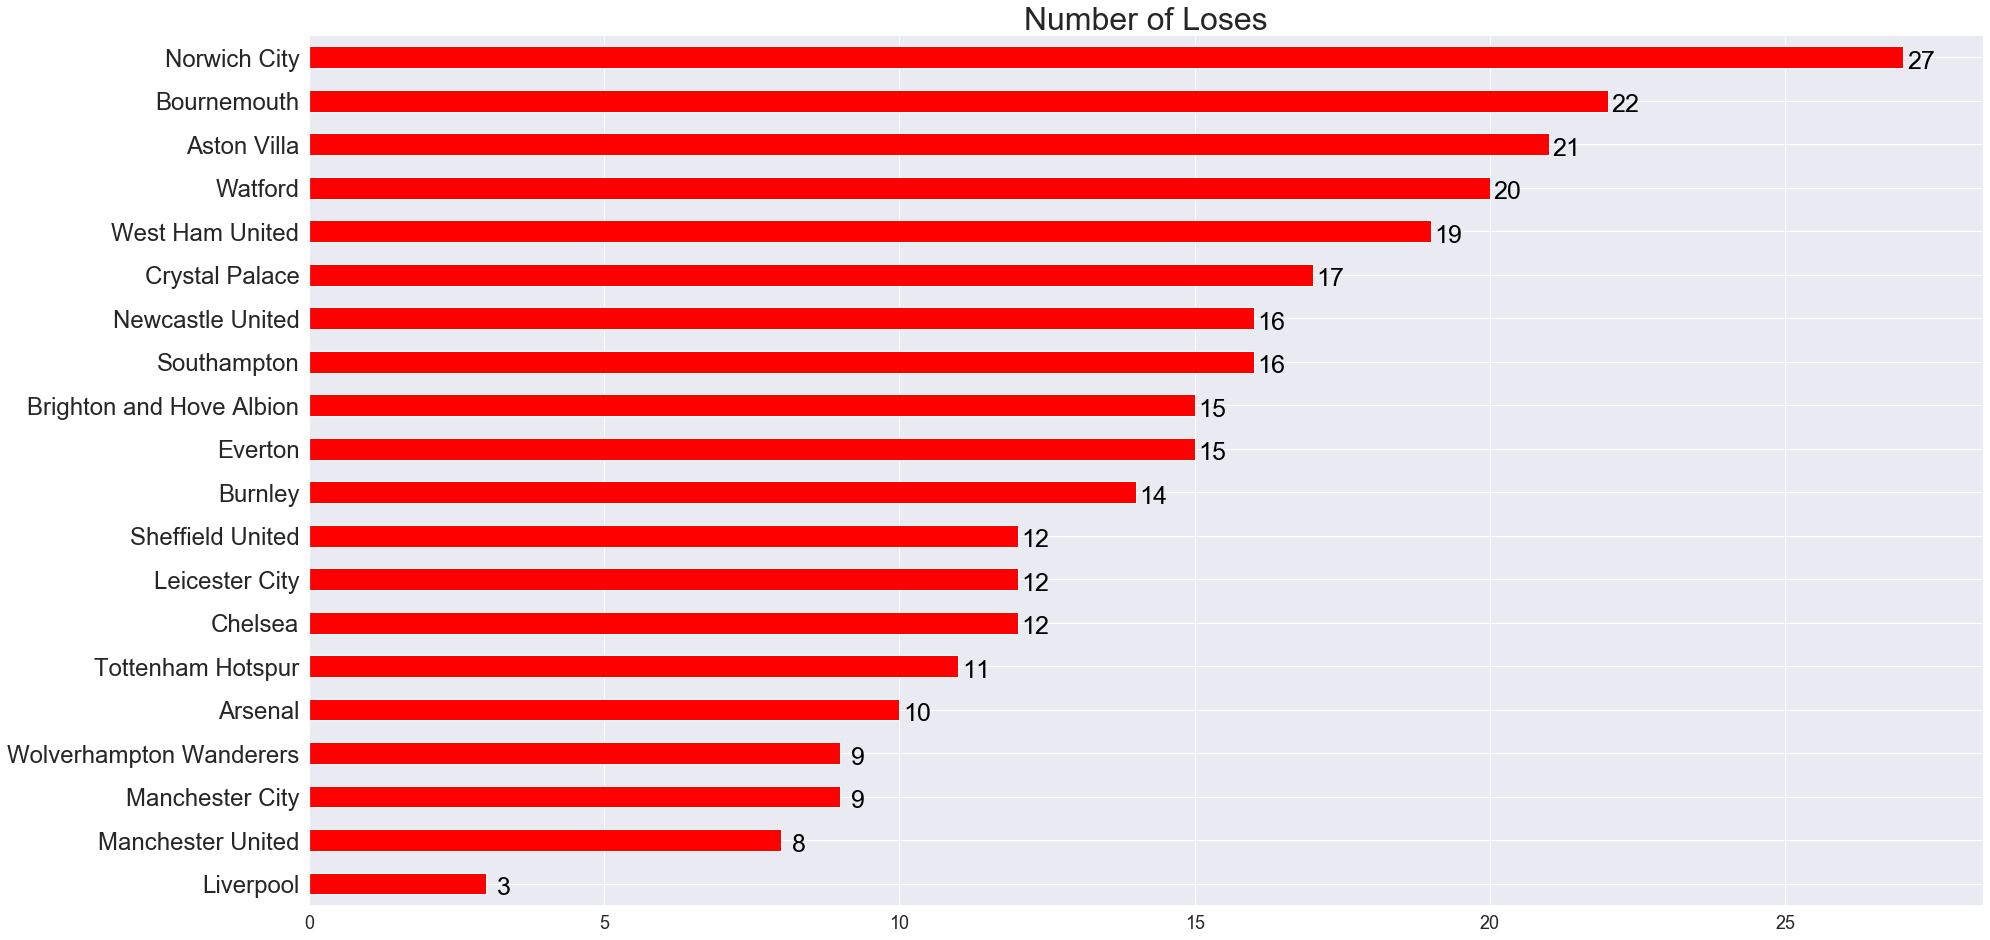

In [58]:
bar = league_table2.plot(kind = 'barh', figsize = (30, 16), color = 'red', legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind2, fontsize = 18)
plt.ylabel('')
plt.title('Number of Loses', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()

In [59]:
league_table3 = league_table[['teams', 'draw']].sort_values(by = 'draw', ascending = True)

In [60]:
ind3 = league_table3.set_index('teams', inplace = True)

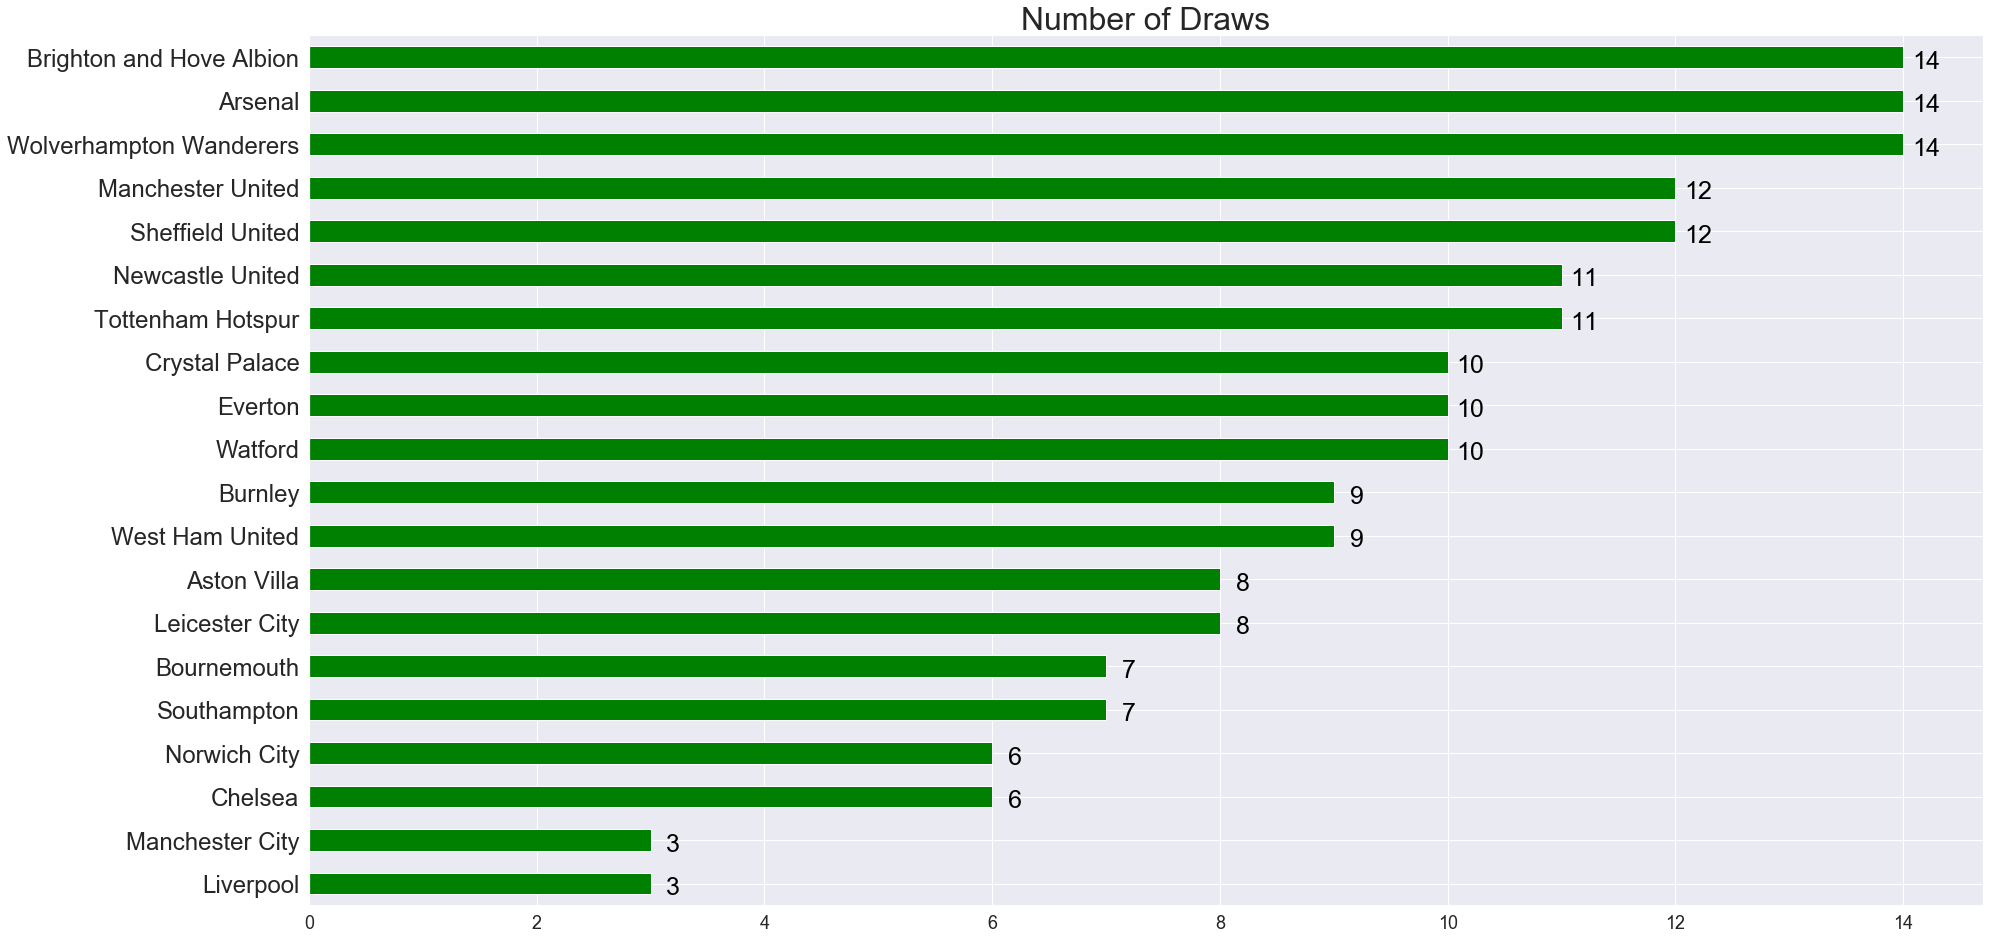

In [61]:
bar = league_table3.plot(kind = 'barh', figsize = (30, 16), color = 'green', legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind3, fontsize = 18)
plt.ylabel('')
plt.title('Number of Draws', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.2, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()

In [62]:
league_table4 = league_table[['teams', 'goal_for']].sort_values(by = 'goal_for', ascending = True)

In [63]:
ind4 = league_table4.set_index('teams', inplace = True)

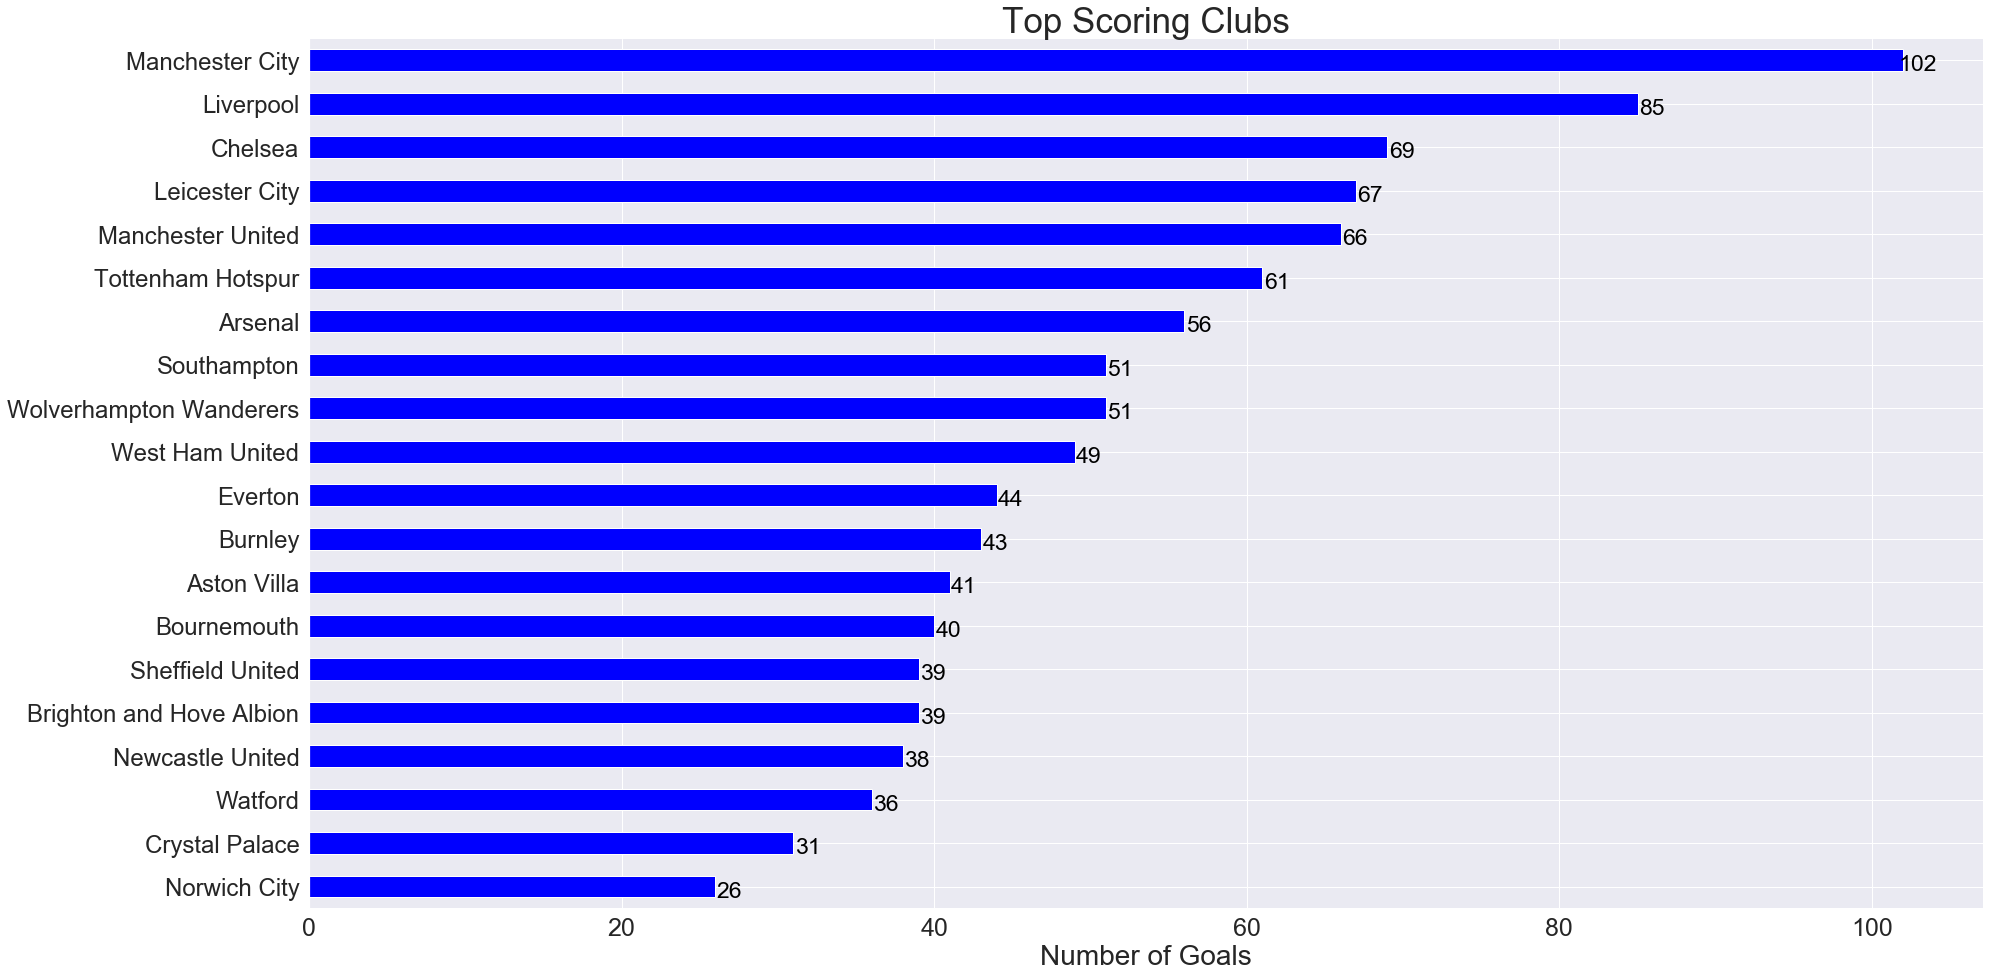

In [64]:
bar = league_table4.plot(kind = 'barh', figsize = (30, 16), color = 'blue', legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind4, fontsize = 25)
plt.ylabel('')
plt.xlabel('Number of Goals', fontsize = 28)
plt.title("Top Scoring Clubs", fontsize = 35)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.9, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=23, color = 'black', ha = 'center', va = 'center')
plt.show()

In [65]:
league_table5 = league_table[['teams', 'goal_against']].sort_values(by = 'goal_against', ascending = True)

In [66]:
ind5 = league_table5.set_index('teams', inplace = True)

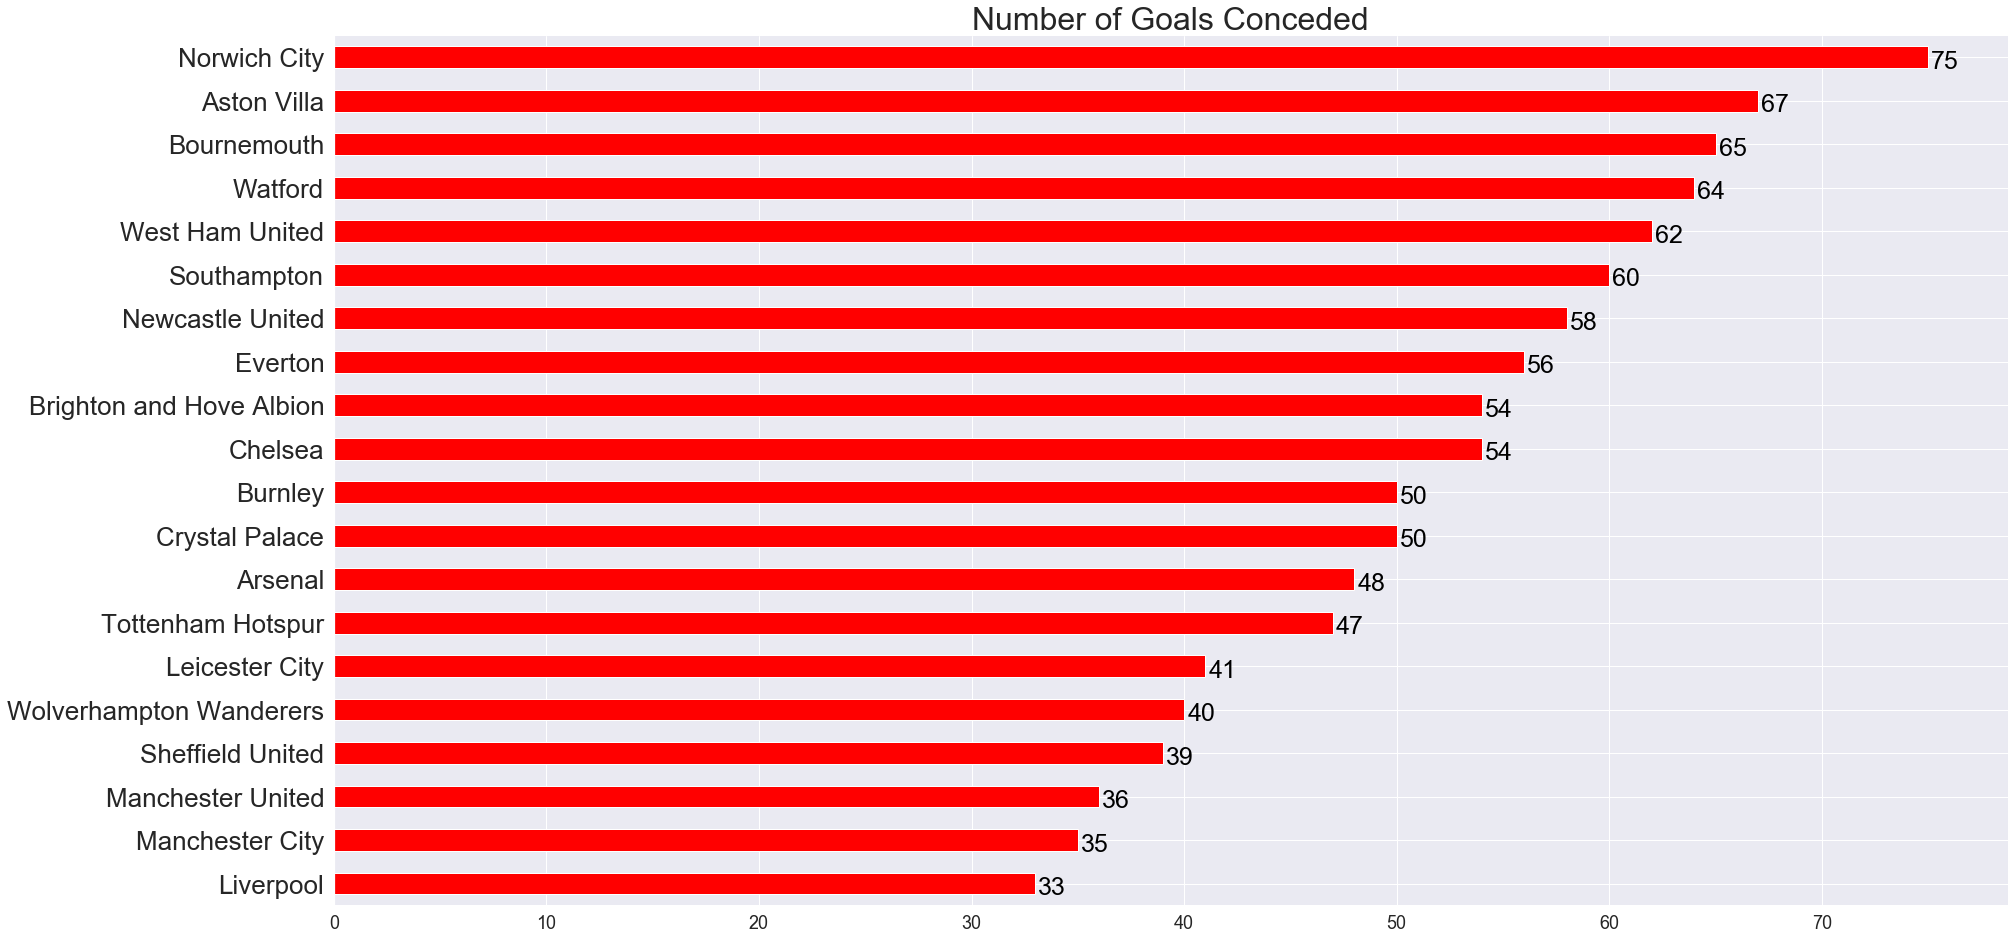

In [67]:
bar = league_table5.plot(kind = 'barh', figsize = (30, 16), color = 'red', legend = None)
bar
plt.yticks(ind5, fontsize = 26)
plt.xticks(ind5, fontsize = 18)
plt.ylabel('')
plt.title('Number of Goals Conceded', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.8, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()

In [68]:
top_scorers1 = top_scorers[['Player', 'Goals']].sort_values(by = 'Goals', ascending =True)

In [69]:
ind6 = top_scorers1.set_index('Player', inplace = True)

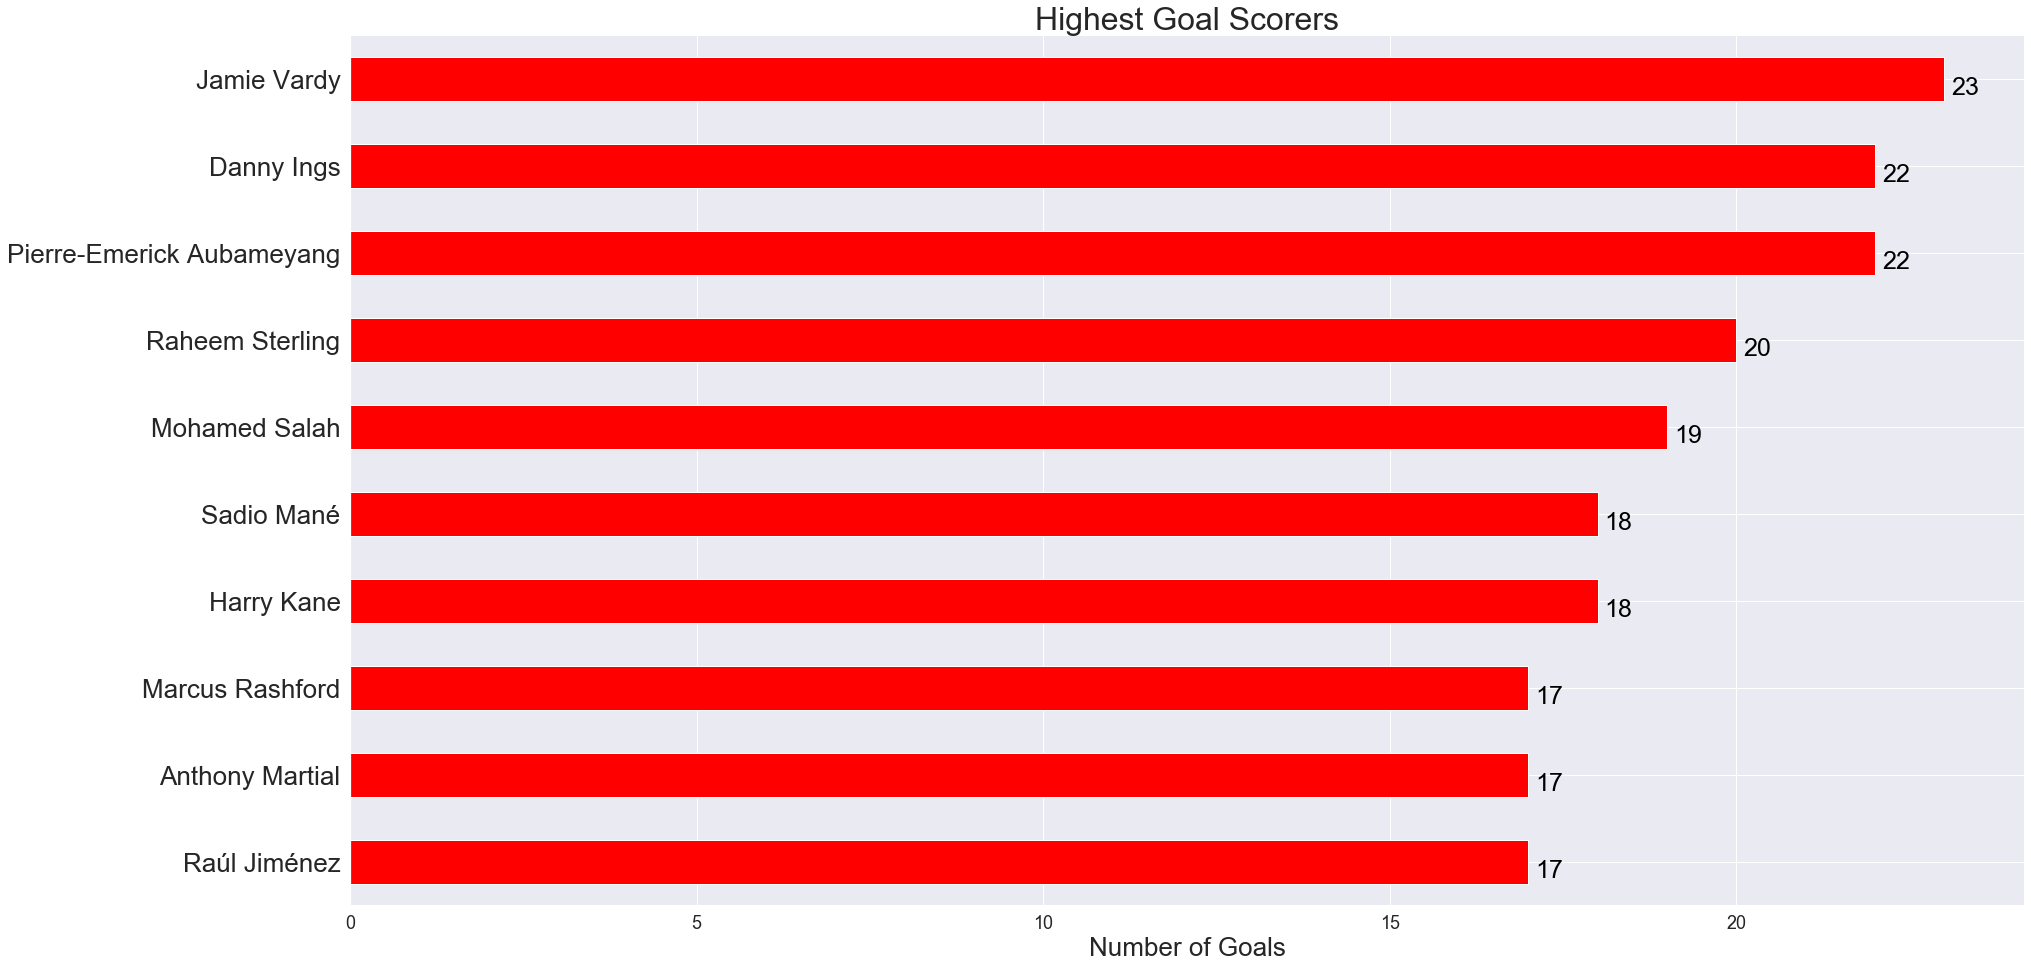

In [70]:
bar = top_scorers1.plot(kind = 'barh', figsize = (30, 16), color = 'red', legend = None)
bar
plt.yticks(ind6, fontsize = 26)
plt.xticks(ind6, fontsize = 18)
plt.ylabel('')
plt.xlabel('Number of Goals', fontsize = 26)
plt.title('Highest Goal Scorers', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()

In [71]:
assists_chart1 = assists_chart[['Player', 'Assists']].sort_values(by = 'Assists', ascending =True)

In [72]:
ind7 = assists_chart1.set_index('Player', inplace = True)

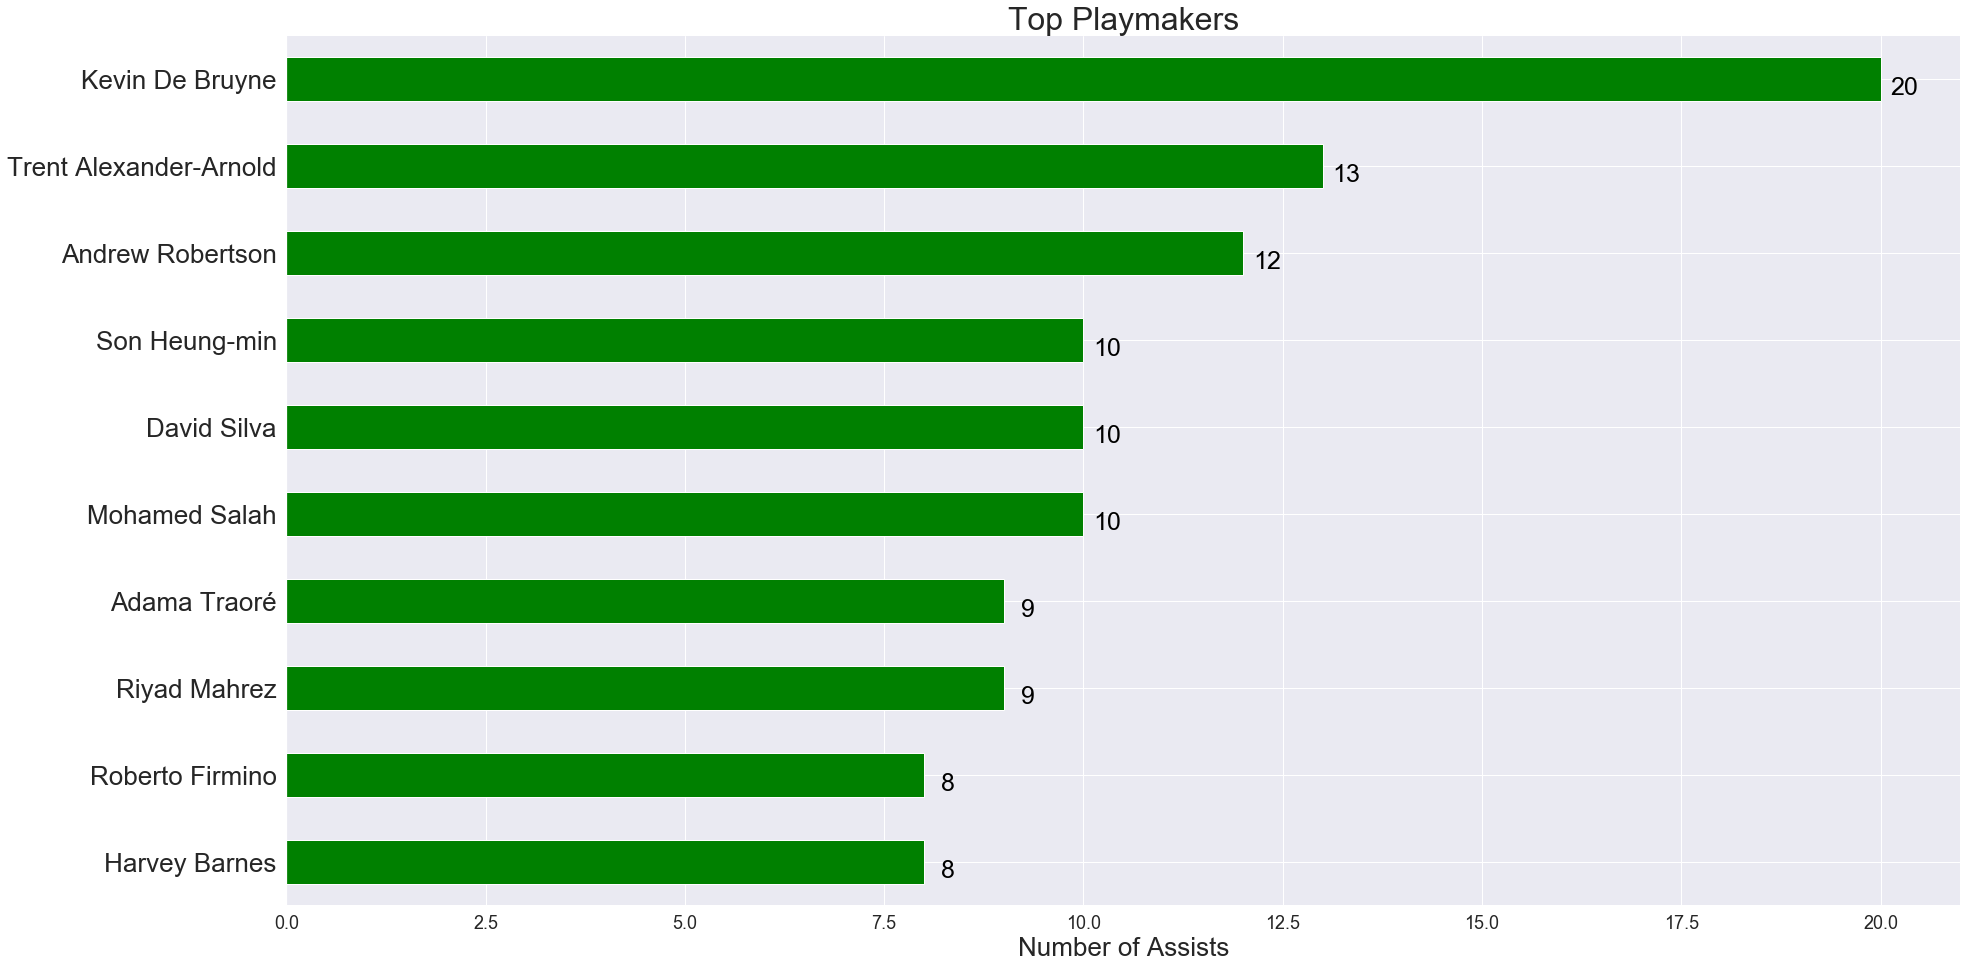

In [73]:
bar = assists_chart1.plot(kind = 'barh', figsize = (30, 16), color = 'green', legend = None)
bar
plt.yticks(fontsize = 26)
plt.xticks(ind7, fontsize = 18)
plt.ylabel('')
plt.xlabel('Number of Assists', fontsize = 26)
plt.title('Top Playmakers', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()

In [74]:
clean_sheet1 = clean_sheet[['Player', 'Clean sheets']].sort_values(by = 'Clean sheets', ascending = True)

In [75]:
ind8= clean_sheet1.set_index('Player', inplace = True)

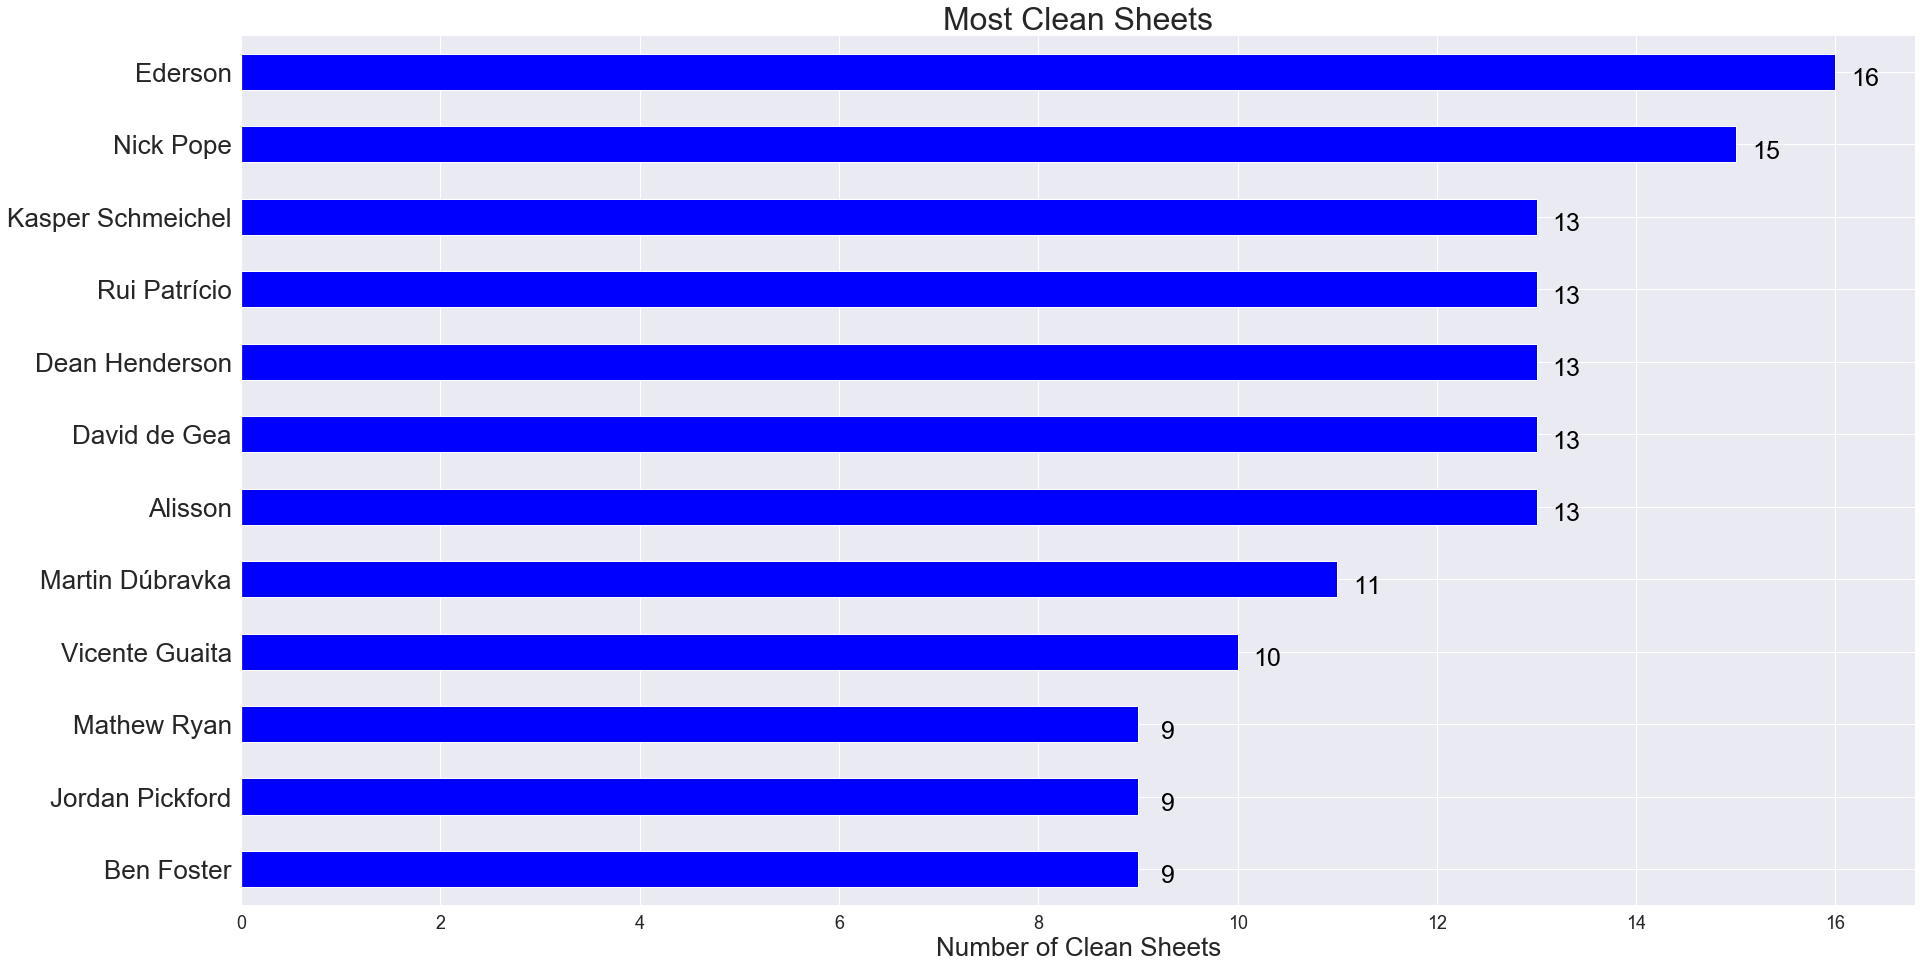

In [76]:
bar = clean_sheet1.plot(kind = 'barh', figsize = (30, 16), color = 'blue', legend = None)
bar
plt.yticks(ind8, fontsize = 26)
plt.xticks(ind8, fontsize = 18)
plt.ylabel('')
plt.xlabel('Number of Clean Sheets', fontsize = 26)
plt.title('Most Clean Sheets', fontsize = 32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
for i in bar.patches:
    bar.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=25, color = 'black', ha = 'center', va = 'center')
plt.show()

In [77]:
league_table

,position,teams,games_played,win,draw,lose,goal_for,goal_against,goal_dif,points,points/game
0,1,Liverpool,38,32,3,3,85,33,52,99,2.605263
1,2,Manchester City,38,26,3,9,102,35,67,81,2.131579
2,3,Manchester United,38,18,12,8,66,36,30,66,1.736842
3,4,Chelsea,38,20,6,12,69,54,15,66,1.736842
4,5,Leicester City,38,18,8,12,67,41,26,62,1.631579
5,6,Tottenham Hotspur,38,16,11,11,61,47,14,59,1.552632
6,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59,1.552632
7,8,Arsenal,38,14,14,10,56,48,8,56,1.473684
8,9,Sheffield United,38,14,12,12,39,39,0,54,1.421053
9,10,Burnley,38,15,9,14,43,50,-7,54,1.421053


In [78]:
top7_drawn=league_table.head(7)

In [79]:
bottom6_drawn=league_table.tail(6)

In [82]:
ftop7_drawn = top7_drawn[['position', 'teams', 'draw']]


In [83]:
pind5 = ftop7_drawn.set_index('position', inplace = True)

In [86]:
fbottom6_drawn = bottom6_drawn[['position', 'teams', 'draw']]

In [87]:
pind6 = fbottom6_drawn.set_index('position', inplace = True)

In [88]:
ftop7_drawn

,teams,draw
position,,
1,Liverpool,3
2,Manchester City,3
3,Manchester United,12
4,Chelsea,6
5,Leicester City,8
6,Tottenham Hotspur,11
7,Wolverhampton Wanderers,14


In [89]:
bottom6_drawn

,position,teams,draw
14,15,Brighton and Hove Albion,14
15,16,West Ham United,9
16,17,Aston Villa,8
17,18,Bournemouth,7
18,19,Watford,10
19,20,Norwich City,6


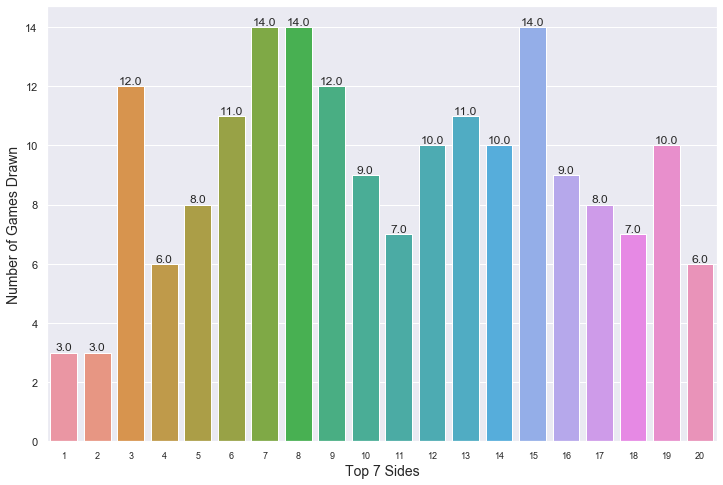

In [54]:
tp = sns.barplot('position', 'draw', data = league_table)
for p in tp.patches:
    tp.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  size = 12,
                  xytext = (0, 5),
                  textcoords = 'offset points')
    plt.xticks(fontsize = 9)
    plt.xlabel('Top 7 Sides', size = 14)
    plt.ylabel('Number of Games Drawn', size = 14)
sns.set(rc={'figure.figsize':(12,8)})
plt.savefig('20 top 7.png', dpi = 150, bbox_inches = 'tight')

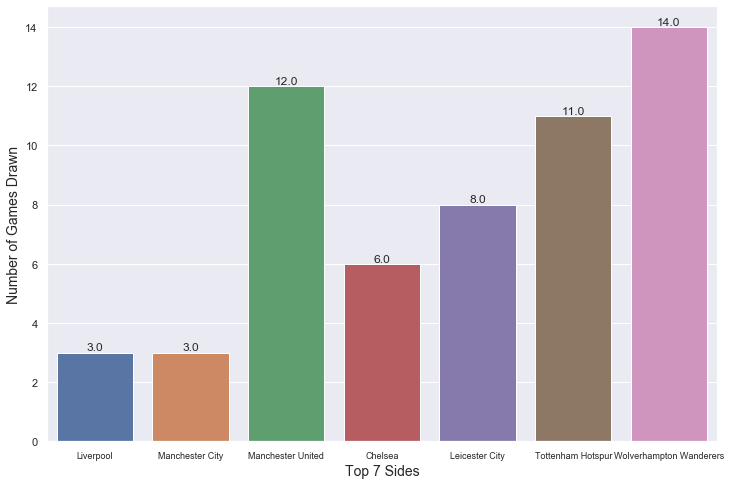

In [90]:
topplot = sns.barplot('teams', 'draw', data = top7_drawn)
for p in topplot.patches:
    topplot.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  size = 12,
                  xytext = (0, 5),
                  textcoords = 'offset points')
    plt.xticks(fontsize = 9)
    plt.xlabel('Top 7 Sides', size = 14)
    plt.ylabel('Number of Games Drawn', size = 14)
    sns.set(rc={'figure.figsize':(12,8)})
    plt.savefig('20.png', dpi = 150, bbox_inches = 'tight')

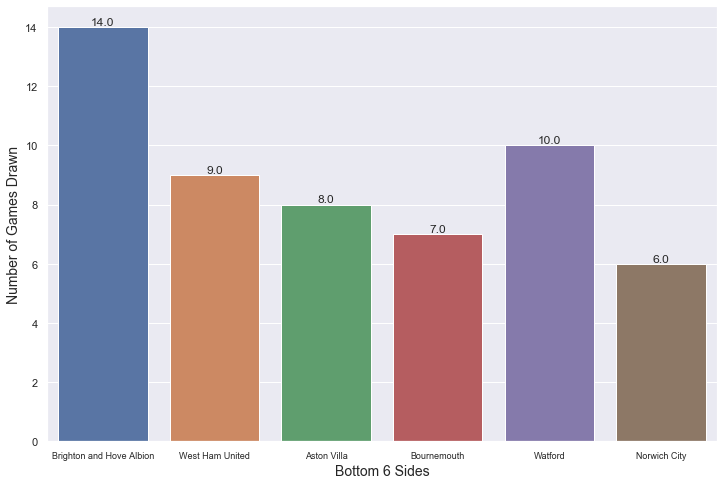

In [91]:
botplot = sns.barplot('teams', 'draw', data = bottom6_drawn)
for p in botplot.patches:
    botplot.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  size = 12,
                  xytext = (0, 5),
                  textcoords = 'offset points')
    plt.xticks(fontsize = 9)
    plt.xlabel('Bottom 6 Sides', size = 14)
    plt.ylabel('Number of Games Drawn', size = 14)
    sns.set(rc={'figure.figsize':(12,8)})
    plt.savefig('21.png', dpi = 150, bbox_inches = 'tight')

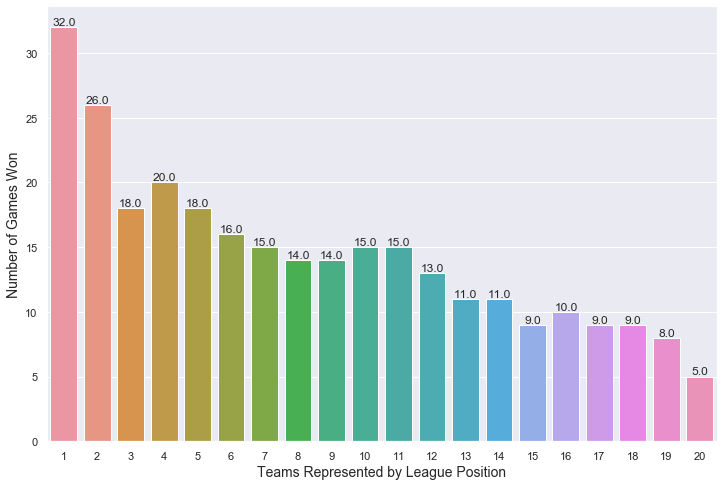

In [94]:
winplot = sns.barplot('position', 'win', data = league_table)
for p in winplot.patches:
    winplot.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  size = 12,
                  xytext = (0, 5),
                  textcoords = 'offset points')
    plt.xlabel('Teams Represented by League Position', size = 14)
    plt.ylabel('Number of Games Won', size = 14)
    sns.set(rc={'figure.figsize':(12,8)})
    plt.savefig('22.png', dpi = 150, bbox_inches = 'tight') 

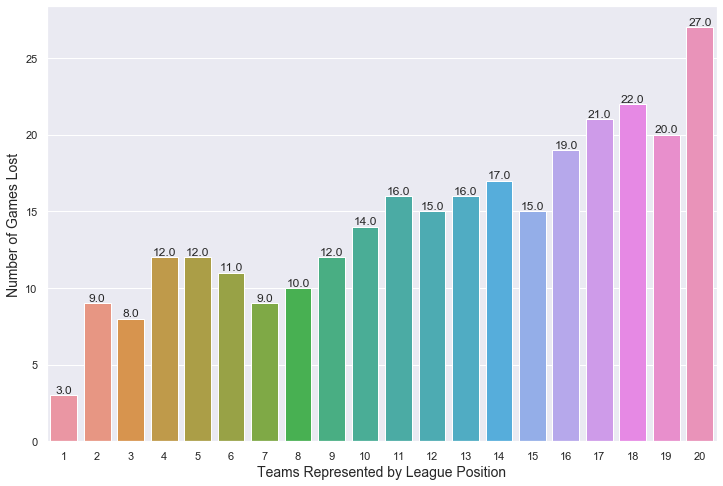

In [95]:
lose_plot = sns.barplot('position', 'lose', data = league_table)
for p in lose_plot.patches:
    lose_plot.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  size = 12,
                  xytext = (0, 5),
                  textcoords = 'offset points')
    plt.xlabel('Teams Represented by League Position', size = 14)
    plt.ylabel('Number of Games Lost', size = 14)
    sns.set(rc={'figure.figsize':(12,8)})
    plt.savefig('23.png', dpi = 150, bbox_inches = 'tight')

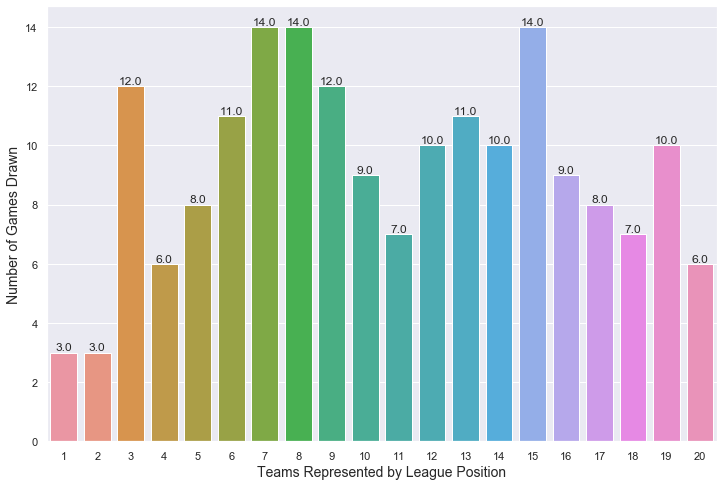

In [96]:
splot = sns.barplot('position', 'draw', data = league_table)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  size = 12,
                  xytext = (0, 5),
                  textcoords = 'offset points')
    plt.xlabel('Teams Represented by League Position', size = 14)
    plt.ylabel('Number of Games Drawn', size = 14)
    sns.set(rc={'figure.figsize':(12,8)})
    plt.savefig('24.png', dpi = 150, bbox_inches = 'tight')